In [2]:
import matplotlib.pyplot as plt 
font = {'size'   : 14}
import matplotlib
matplotlib.rc('font', **font)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MDS3020 - Introducción a Ciencia de Datos

## Tutorial 8: Análisis Exploratorio Univariado.
---

## Introducción.

En clases anteriores, hemos planteado como ejemplo un caso de estudio orientado a la construcción y análisis de una base de datos para el estudio de factores determinantes en el rendimiento escolar de los estudiantes de educación básica y media en Chile. En particular, se busca analizar la relación entre el **rendimiento escolar**, representado por el promedio general de notas de cada estudiante, y factores determinantes como el **porcentaje de asistencia a clases, y la razón entre docentes y estudiantes de los establecimientos educacionales**. 

Para este estudio, se utilizarán datos generados y publicados por el  Centro de Estudios del Ministerio de Educación de Chile, https://centroestudios.mineduc.cl/: <br>

*El Centro de Estudios pone a disposición del público en general la plataforma Datos Abiertos para compartir información estadística en materia de educación, que incluye bases de datos de establecimientos educacionales, estudiantes y párvulos, docentes y asistentes de la educación, y sostenedores. Además, se entrega información georreferenciada.*

En este tutorial, nos enfocaremos en el análisis exploratorio de uno de los conjuntos de datos publicados por el MINEDUC, relativo al rendimiento escolar de los estudiantes de Chile en el año 2021.

## Referencias.

Para el análisis exploratorio gráfico, utilizaremos principalmente `seaborn`, una librería de visualización de datos bada en `matplotlib`. Se recomienda revisar la documentoación y galerías de ejemplos disponibles en https://seaborn.pydata.org/index.html.

### 1. Lectura de datos

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/semana5/RendimientoEscolar_EDA.csv')
df.head()

,REGION,RURAL,TIPO_ENSE,EDAD_ALU,PROM_GRAL,ASISTENCIA,SITUACION_FINAL
0,9,0,BASICA,8,7.0,100,P
1,13,0,MEDIA_CH,16,6.7,100,P
2,15,0,MEDIA_CH,17,6.5,90,P
3,9,1,BASICA,9,6.4,100,P
4,13,0,BASICA,13,5.6,79,P


In [4]:
#conversión a variables categóricas
df['REGION']=df['REGION'].astype('category')
df['RURAL']=df['RURAL'].astype('category')
df['TIPO_ENSE']=df['TIPO_ENSE'].astype('category')
df['SITUACION_FINAL']=df['SITUACION_FINAL'].astype('category')

In [5]:
df=df.rename(columns={'PROM_GRAL':'NOTA_FINAL','TIPO_ENSE':'NIVEL_EDUCACION','EDAD_ALU':'EDAD_ALUMNO'})
df.sample(5)

,REGION,RURAL,NIVEL_EDUCACION,EDAD_ALUMNO,NOTA_FINAL,ASISTENCIA,SITUACION_FINAL
236650,13,0,BASICA,9,6.7,100,P
120102,5,0,BASICA,12,6.4,85,P
22527,12,0,MEDIA_CH,17,6.6,100,P
603213,8,0,BASICA,9,6.2,100,P
736670,13,0,BASICA,10,6.8,86,P


### 2. ¿Cuántos estudiantes, tipos de educación, regiones hay? ¿Cuál es la región con más estudiantes?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   REGION           987653 non-null  category
 1   RURAL            987653 non-null  category
 2   NIVEL_EDUCACION  987653 non-null  category
 3   EDAD_ALUMNO      987653 non-null  int64   
 4   NOTA_FINAL       987653 non-null  float64 
 5   ASISTENCIA       987653 non-null  int64   
 6   SITUACION_FINAL  987653 non-null  category
dtypes: category(4), float64(1), int64(2)
memory usage: 26.4 MB


In [7]:
df['NIVEL_EDUCACION'].value_counts()

NIVEL_EDUCACION
BASICA      678915
MEDIA_CH    227763
MEDIA_TP     80975
Name: count, dtype: int64

In [8]:
df['REGION'].unique()

[9, 13, 15, 8, 5, ..., 10, 7, 11, 12, 3]
Length: 16
Categories (16, int64): [1, 2, 3, 4, ..., 13, 14, 15, 16]

In [9]:
df['REGION'].value_counts()

REGION
13    375577
5      98338
8      86823
7      61118
9      58677
6      53462
10     50821
4      46925
2      36446
16     26979
14     22512
1      21974
3      18396
15     14391
12      8693
11      6521
Name: count, dtype: int64

### 3. ¿Cómo es en general el rendimiento académico y la asistencia de los estudiantes?

In [10]:
df.describe()

,EDAD_ALUMNO,NOTA_FINAL,ASISTENCIA
count,987653.000000,987653.000000,987653.000000
mean,10.731128,5.802046,85.660207
std,4.666320,1.342020,22.693419
min,0.000000,0.000000,0.000000
25%,8.000000,5.500000,85.000000
50%,11.000000,6.100000,91.000000
75%,14.000000,6.600000,99.000000
max,59.000000,7.000000,100.000000


#### Boxplots con `seaborn`: https://seaborn.pydata.org/generated/seaborn.boxplot.html


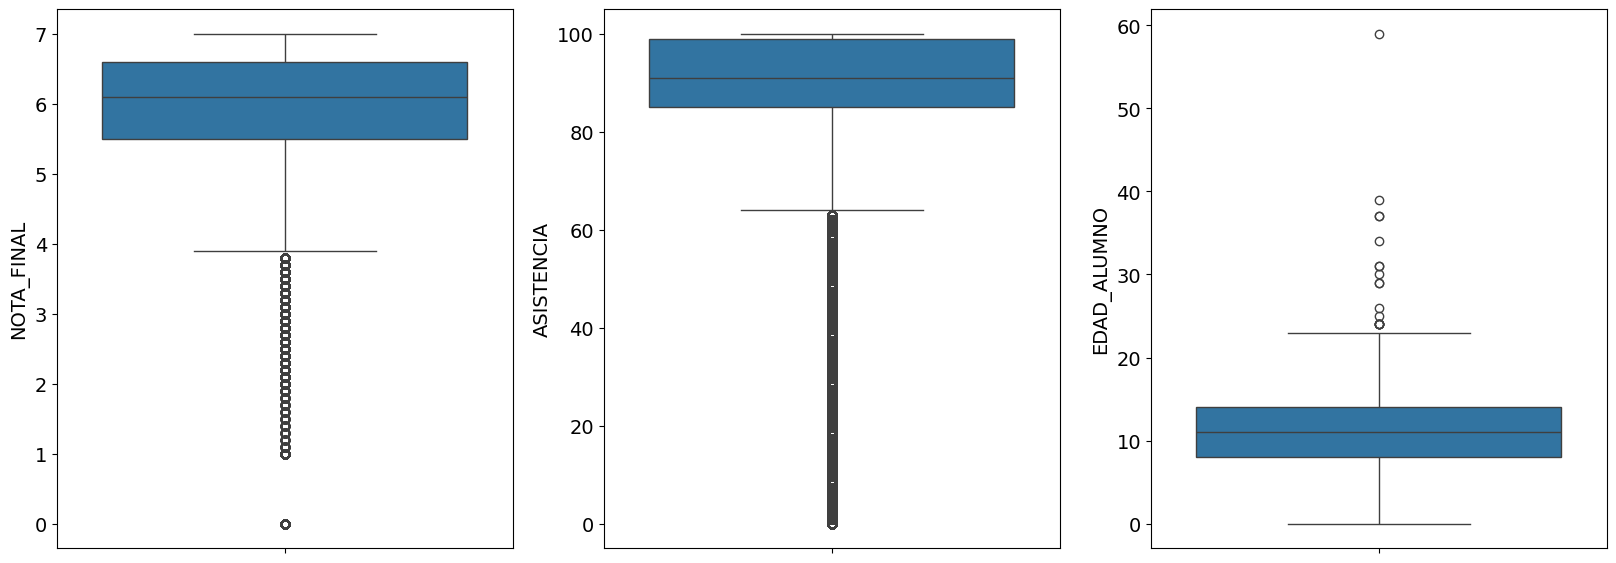

In [11]:
#Graficos de cajas

fig=plt.figure(figsize=(20,7))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)


sns.boxplot(data=df,y='NOTA_FINAL',ax=ax1);
sns.boxplot(data=df,y='ASISTENCIA',ax=ax2);
sns.boxplot(data=df,y='EDAD_ALUMNO',ax=ax3);



#### Histogramas con `seaborn`: https://seaborn.pydata.org/generated/seaborn.histplot.html


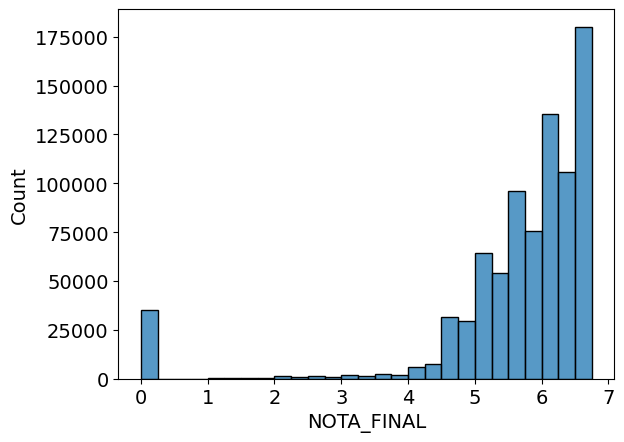

In [12]:
#Analizar distintos tipos de binning
sns.histplot(data=df,x='NOTA_FINAL',bins=np.arange(0,7,0.25));

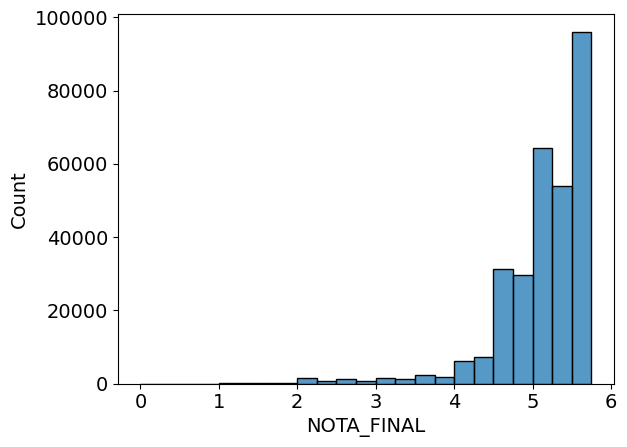

In [36]:
sns.histplot(data=df,x='NOTA_FINAL',bins=np.arange(0,6,0.25));

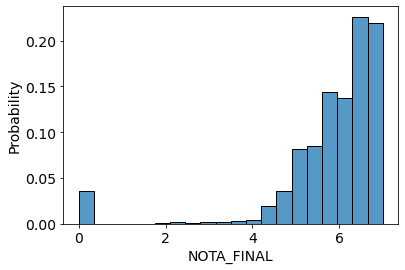

In [13]:
#Histograma en términos de la función de probabilidad
sns.histplot(data=df,x='NOTA_FINAL',bins=20,stat='probability');

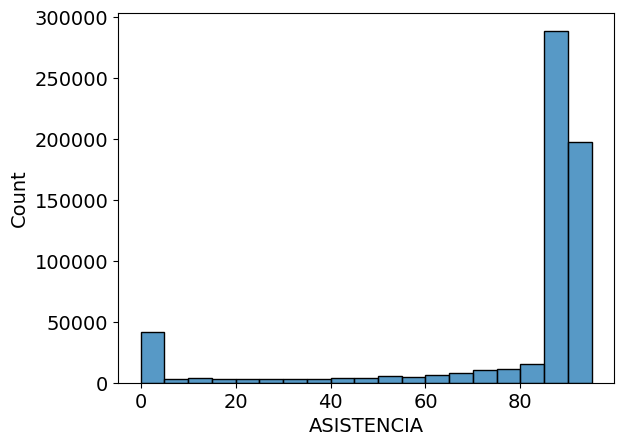

In [13]:
sns.histplot(data=df,x='ASISTENCIA',bins=np.arange(0,100,5));

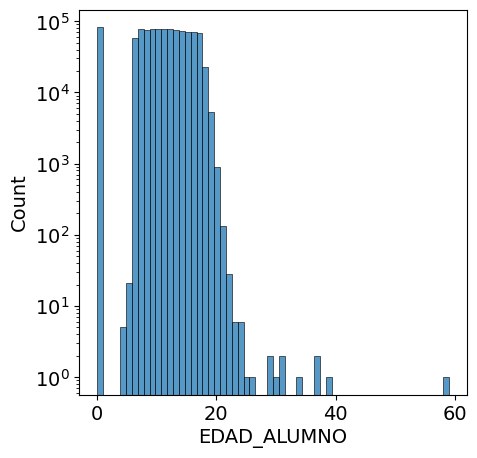

In [14]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
sns.histplot(data=df,x='EDAD_ALUMNO',bins=60);
ax.set_yscale('log')

**Notas:** Revise la documentación de `seaborn.histplot`y verifique cómo cambian sus gráficos al cambiar los argumentos:`bins`,`stat`,`kde`y otros que llamen su atención.

In [15]:
df[df['NOTA_FINAL']==0]

,REGION,RURAL,NIVEL_EDUCACION,EDAD_ALUMNO,NOTA_FINAL,ASISTENCIA,SITUACION_FINAL
27,13,0,BASICA,7,0.0,0,T
31,10,0,MEDIA_CH,17,0.0,0,T
53,13,0,BASICA,10,0.0,0,T
59,13,0,MEDIA_TP,16,0.0,0,T
80,13,0,BASICA,6,0.0,0,Y
...,...,...,...,...,...,...,...
987434,13,0,BASICA,7,0.0,0,T
987569,8,0,BASICA,11,0.0,0,T
987576,13,0,MEDIA_TP,19,0.0,0,T
987631,8,0,MEDIA_TP,0,0.0,0,Y


In [16]:
df[df['EDAD_ALUMNO']==0]

,REGION,RURAL,NIVEL_EDUCACION,EDAD_ALUMNO,NOTA_FINAL,ASISTENCIA,SITUACION_FINAL
25,14,1,BASICA,0,4.5,100,P
26,16,0,MEDIA_CH,0,6.4,100,P
40,16,0,BASICA,0,5.3,85,P
41,8,0,BASICA,0,5.6,95,P
58,14,1,BASICA,0,6.6,100,P
...,...,...,...,...,...,...,...
987608,8,0,MEDIA_CH,0,6.0,87,P
987617,8,0,BASICA,0,5.3,85,P
987622,14,0,MEDIA_CH,0,6.7,100,P
987631,8,0,MEDIA_TP,0,0.0,0,Y


In [17]:
df=df[df['NOTA_FINAL']>0]

### 4. ¿Cómo se distribuyen los datos por tipo de educación?

In [18]:
df['NIVEL_EDUCACION'].value_counts()

NIVEL_EDUCACION
BASICA      655808
MEDIA_CH    220062
MEDIA_TP     76663
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='NIVEL_EDUCACION'>

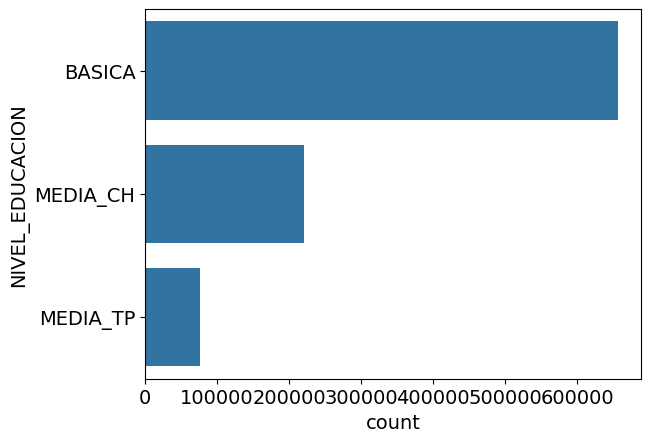

In [19]:
sns.countplot(data=df,y='NIVEL_EDUCACION')

### 5. ¿Cómo se distribuyen los datos de acuerdo a la situación final de los estudiantes?


<Axes: xlabel='SITUACION_FINAL', ylabel='count'>

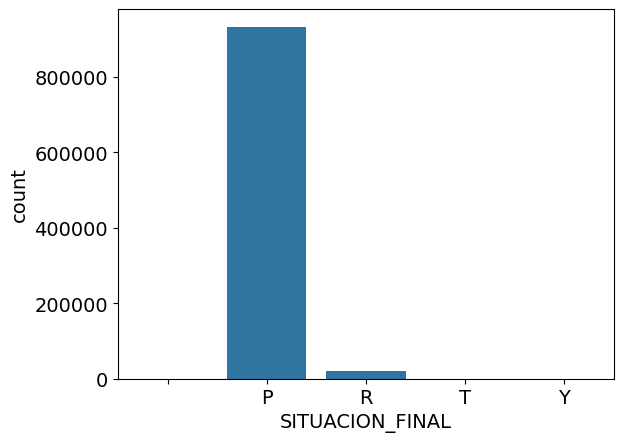

In [20]:
sns.countplot(data=df,x='SITUACION_FINAL')

¿Cuáles son las posibles situaciones finales de un estudiante? ¿Coincide esto con la información inicial?

In [21]:
df['SITUACION_FINAL'].value_counts()

SITUACION_FINAL
P    932923
R     19589
          9
T         7
Y         5
Name: count, dtype: int64

In [22]:
df[df['SITUACION_FINAL']==' ']

,REGION,RURAL,NIVEL_EDUCACION,EDAD_ALUMNO,NOTA_FINAL,ASISTENCIA,SITUACION_FINAL
22552,7,0,MEDIA_CH,16,6.0,0,
49694,6,0,BASICA,14,5.0,0,
94660,6,0,BASICA,13,6.2,0,
215474,7,0,MEDIA_CH,16,6.3,0,
231972,6,0,BASICA,14,6.3,0,
297965,6,0,BASICA,13,6.7,0,
418543,7,0,MEDIA_CH,17,5.4,0,
429264,6,0,BASICA,14,6.5,0,
637393,6,0,BASICA,15,6.2,0,


In [23]:
#seleccionar registros para los cuales la columna 'SITUACION_FINAL' tiene valor distinto 'R' (reprobado) o 'P' (promovido)
df=df[df['SITUACION_FINAL'].isin(['P','R'])]

Mediante estos métodos de exploración, podemos concluir que existen registros de estudiantes con información incompleta, para muchos cuales no se tienen datos de asistencia y/o situación final. Para estos datos, es necesario realizar un análisis más fino para determinar si es posible imputar los datos faltantes, o si es más conveniente eliminar los registros incompletos. 

Por ejemplo, existen registros con nota general 0.0 y asistencia 0%, los cuales son datos anómalos ya que la nota mínima es 1.0. Por lo tanto, estos datos deberían ser eliminados.

Por otra parte, existen registros con nota conocida, pero con porcentaje de asistencia situación final desconocidas. En estos casos podría asumirse la situación final (por ejemplo, se da por promovidos a estudiantes con nota general > 4.0), pero no es posible imputar un porcentaje de asistencia. Acá queda a criterio del analista si es posible determinar un método confiable para completar los datos faltantes, o si es preferible eliminar los registros incompletos.

En este caso, dado que uno de los objetivos es analizar el impacto de la asistencia a clases en el rendimiento escolar y la situación final de los estudiantes, y que los registros incompletos representan una fracción muy menor del conjunto completo, se optará por eliminarlos. En este caso, el análisis exploratorio de una variable categórica no has permitido identificar anomalías y completar la limpieza de datos.

## Análisis Exploratorio Univariado.

A continuación, agregamos algunos análisis multivariados.

### 1. ¿Cómo varía la asistencia por nivel educacional y zona?

¿Hay menor/mayor asistencia en educación básica que en media? ¿Hay menor/mayor asistencia en zonas rurales/urbanas?

In [24]:
#Una tabla pivote permite calcular estadísticas descriptivas, diferenciando por una o más categorías
pd.pivot_table(df,index='NIVEL_EDUCACION',values='ASISTENCIA',aggfunc='mean')

,ASISTENCIA
NIVEL_EDUCACION,
BASICA,89.244513
MEDIA_CH,88.373511
MEDIA_TP,86.457444


En promedio, la asistencia es levemente menor en educación media que en básica.

In [25]:
pv=pd.pivot_table(df,index='NIVEL_EDUCACION',values='ASISTENCIA',columns='RURAL',aggfunc=['mean'])
pv

mean           
RURAL                    0          1
NIVEL_EDUCACION                      
BASICA           88.968881  91.706678
MEDIA_CH         88.377800  88.179352
MEDIA_TP         86.302526  88.829964

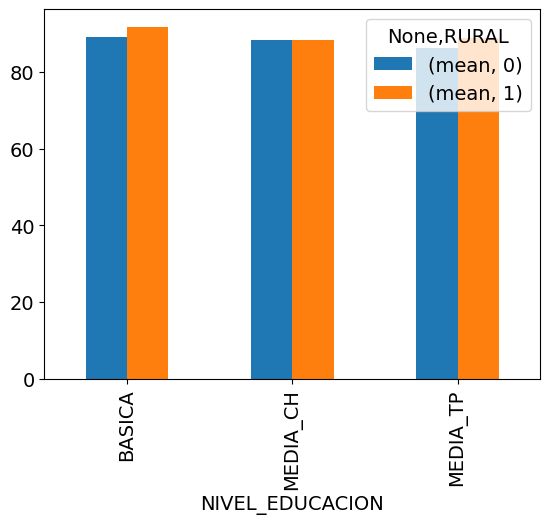

In [26]:
#Una tabla pivote se puede graficar diractemente usando el método plot()
pv.plot.bar();

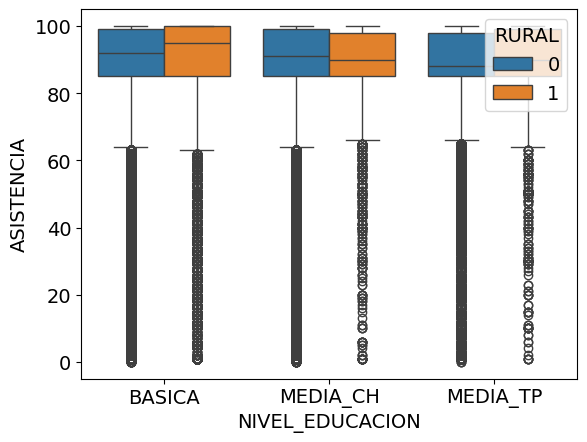

In [27]:
sns.boxplot(data=df,y='ASISTENCIA',x='NIVEL_EDUCACION',hue='RURAL');

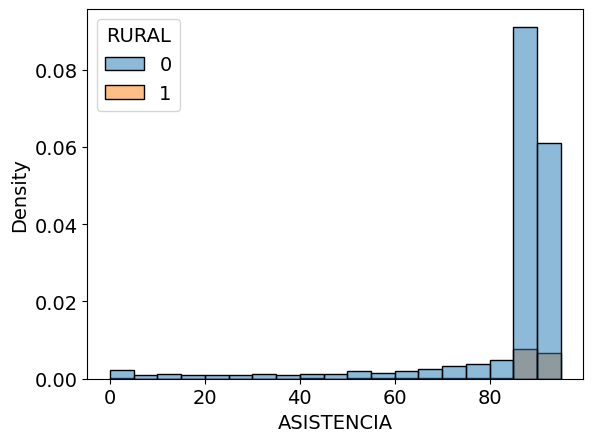

In [28]:
sns.histplot(data=df,x='ASISTENCIA',hue='RURAL',bins=np.arange(0,100,5),stat='density');

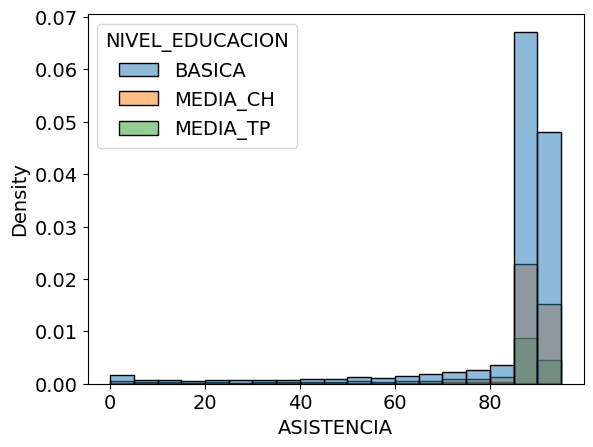

In [29]:
sns.histplot(data=df,x='ASISTENCIA',hue='NIVEL_EDUCACION',bins=np.arange(0,100,5),stat='density');

No se aprecian diferencias significativas en la distribución de notas y asistencia de los escolares por nivel de educación, o entre zonas ruralres/urbanas.

### 3. ¿Cómo varía la asistencia y rendimiento académico por región?


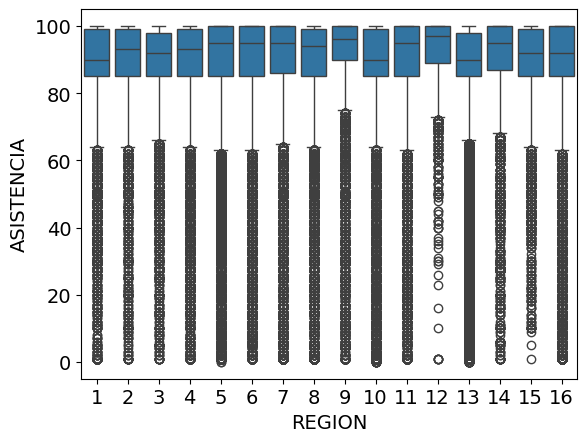

In [30]:
sns.boxplot(data=df,y='ASISTENCIA',x='REGION');


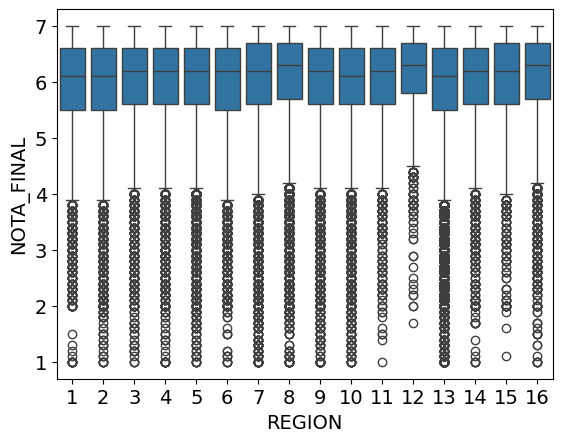

In [31]:
sns.boxplot(data=df,y='NOTA_FINAL',x='REGION');


### 4. ¿Hay correlación entre el rendimiento escolar y la asistencia?


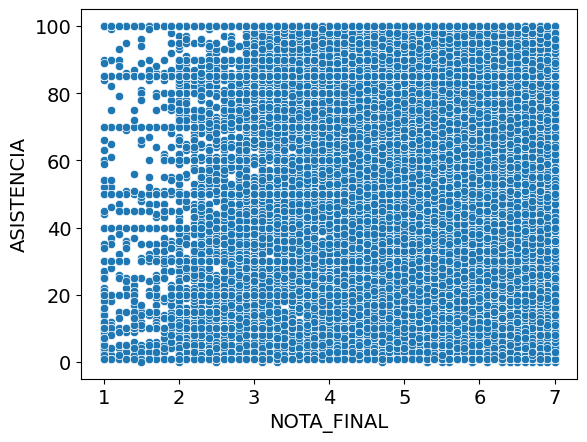

In [32]:
sns.scatterplot(data=df,x='NOTA_FINAL',y='ASISTENCIA');


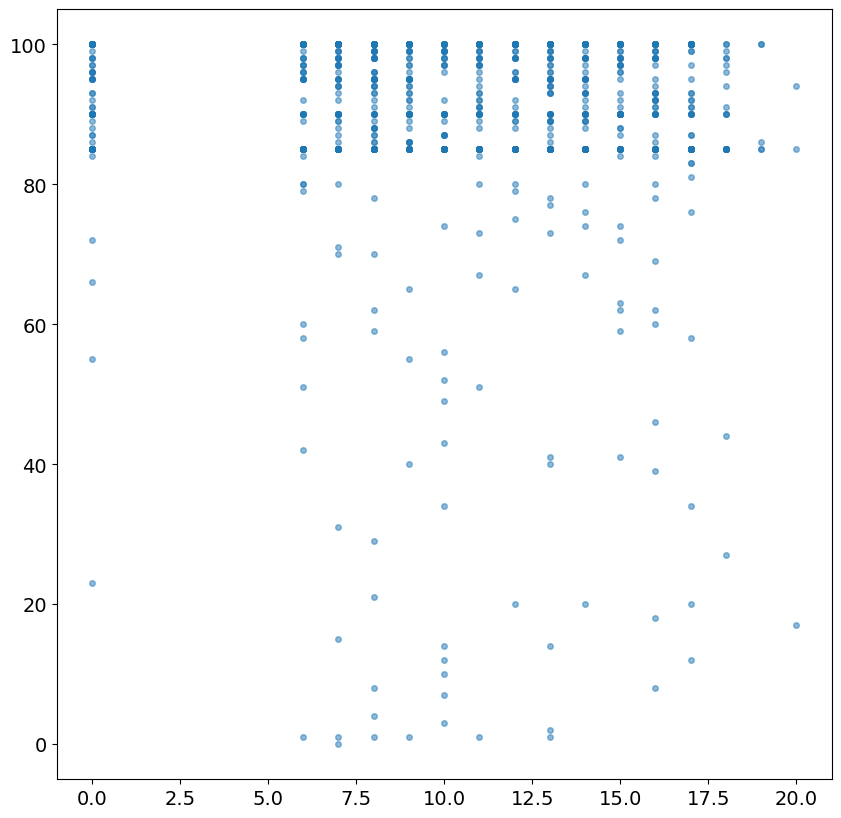

In [33]:
#El gráfico de dispersión está saturado, por lo tanto sampleamos algunos datos para mejor visualización
df2=df.sample(1000)


fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.plot(df2['EDAD_ALUMNO'],df2['ASISTENCIA'],'o',alpha=0.5,markersize=4);

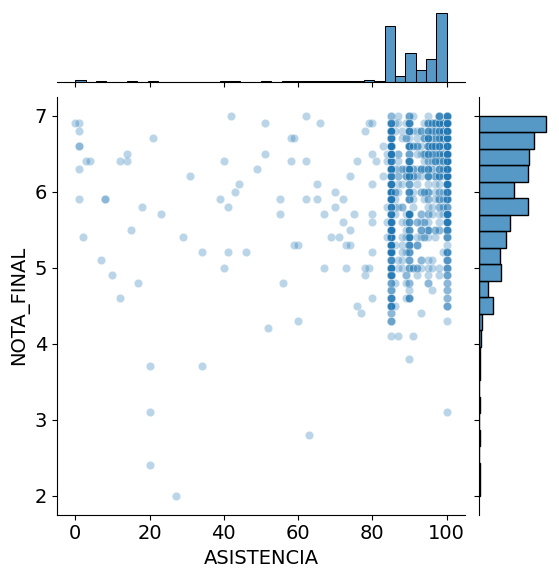

In [34]:
sns.jointplot(data=df2,x='ASISTENCIA',y='NOTA_FINAL',alpha=0.3,marker='o');